In [1]:
import math
import scipy
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'text.usetex' : True})

def mconv(mchirp, eta):
    """Calculates the masses given the chirp mass and symmetric mass ratio."""
    
    mtotal = mchirp * np.power(eta, -3/5)
    mass_1 = mtotal*(1+np.sqrt(1-4*eta))/2
    mass_2 = mtotal*(1-np.sqrt(1-4*eta))/2 

    return mass_1, mass_2 


In [2]:
waveform_metadata_a = pickle.load(open('../../src/output/injections/Waveform A Meta Data.pkl', 'rb'))
waveform_metadata_b = pickle.load(open('../../src/output/injections/Waveform B Meta Data.pkl', 'rb'))

In [3]:

mass_1_a, mass_2_a, a_1_a, a_2_a = waveform_metadata_a['H1']['parameters']['mass_1'], waveform_metadata_a['H1']['parameters']['mass_2'], waveform_metadata_a['H1']['parameters']['a_1'], waveform_metadata_a['H1']['parameters']['a_2']
mass_1_b, mass_2_b, a_1_b, a_2_b = waveform_metadata_b['H1']['parameters']['mass_1'], waveform_metadata_b['H1']['parameters']['mass_2'], waveform_metadata_b['H1']['parameters']['a_1'], waveform_metadata_b['H1']['parameters']['a_2']

mchirp_a, eta_a = np.power(mass_1_a*mass_2_a, 3/5)/np.power(mass_1_a+mass_2_a, 1/5), (mass_1_a*mass_2_a)/np.power(mass_1_a+mass_2_a, 2)
mchirp_b, eta_b = np.power(mass_1_b*mass_2_b, 3/5)/np.power(mass_1_b+mass_2_b, 1/5), (mass_1_b*mass_2_b)/np.power(mass_1_b+mass_2_b, 2)


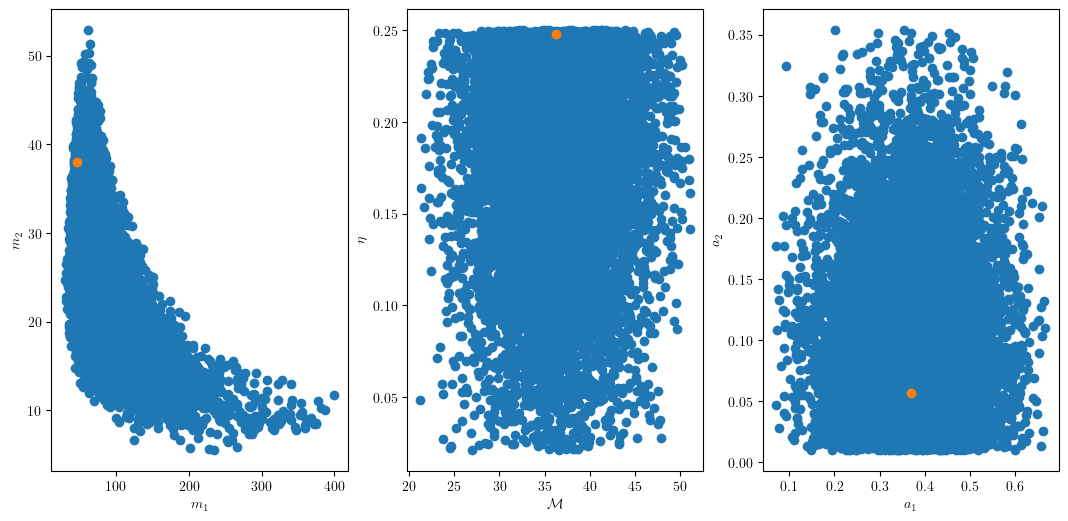

In [4]:
mchirp, eta, a_1, a_2 = mchirp_a, eta_a, a_1_a, a_2_a
N_iter = int(1e4)

# Distributing the initial array of pointss as a truncated normal continuous rv around the injected values

mchirp_0 = scipy.stats.truncnorm.rvs(-3, 3, size=10*N_iter)*5+mchirp
eta_0 = scipy.stats.truncnorm.rvs(-3, 3, size=10*N_iter)/10+eta
a_1_0 = scipy.stats.truncnorm.rvs(-3, 3, size=10*N_iter)/10+a_1
a_2_0 = scipy.stats.truncnorm.rvs(-3, 3, size=10*N_iter)/10+a_2

# Selecting the physically alllowed solutions

idx = (mchirp_0>1) & (mchirp_0<200) & (eta_0>0.02) & (eta_0<0.25) & (a_1_0>0.01) & (a_1_0<0.99) & (a_2_0>0.01) & (a_2_0<0.99)

# Appending an array of initial points spread as a Gaussian around the injected values

mchirp_0 = np.append(mchirp, np.random.choice(mchirp_0[idx], N_iter-1))
eta_0 = np.append(eta, np.random.choice(eta_0[idx], N_iter-1))
a_1_0 = np.append(a_1, np.random.choice(a_1_0[idx], N_iter-1))
a_2_0 = np.append(a_2, np.random.choice(a_2_0[idx], N_iter-1))

mass_1, mass_2 = mconv(mchirp_0, eta_0)

fig, ax = plt.subplots(1,3, figsize=(13, 6))

ax[0].scatter(mass_1, mass_2)
ax[0].scatter(mass_1_a, mass_2_a)
ax[0].set_ylabel('$m_2$')
ax[0].set_xlabel('$m_1$')

ax[1].scatter(mchirp_0, eta_0)
ax[1].scatter(mchirp, eta)
ax[1].set_ylabel('$\\eta$')
ax[1].set_xlabel('$\\mathcal{M}$')

ax[2].scatter(a_1_0, a_2_0)
ax[2].scatter(a_1, a_2)
ax[2].set_ylabel('$a_2$')
ax[2].set_xlabel('$a_1$')

plt.show()

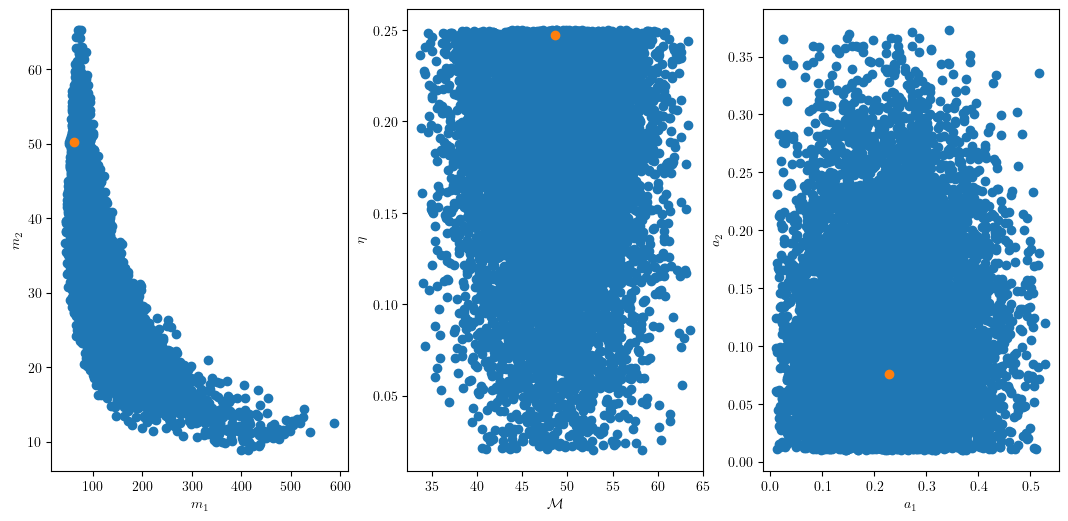

In [5]:
mchirp, eta, a_1, a_2 = mchirp_b, eta_b, a_1_b, a_2_b
N_iter = int(1e4)

# Distributing the initial array of pointss as a truncated normal continuous rv around the injected values

mchirp_0 = scipy.stats.truncnorm.rvs(-3, 3, size=10*N_iter)*5+mchirp
eta_0 = scipy.stats.truncnorm.rvs(-3, 3, size=10*N_iter)/10+eta
a_1_0 = scipy.stats.truncnorm.rvs(-3, 3, size=10*N_iter)/10+a_1
a_2_0 = scipy.stats.truncnorm.rvs(-3, 3, size=10*N_iter)/10+a_2

# Selecting the physically alllowed solutions

idx = (mchirp_0>1) & (mchirp_0<200) & (eta_0>0.02) & (eta_0<0.25) & (a_1_0>0.01) & (a_1_0<0.99) & (a_2_0>0.01) & (a_2_0<0.99)

# Appending an array of initial points spread as a Gaussian around the injected values

mchirp_0 = np.append(mchirp, np.random.choice(mchirp_0[idx], N_iter-1))
eta_0 = np.append(eta, np.random.choice(eta_0[idx], N_iter-1))
a_1_0 = np.append(a_1, np.random.choice(a_1_0[idx], N_iter-1))
a_2_0 = np.append(a_2, np.random.choice(a_2_0[idx], N_iter-1))

mass_1, mass_2 = mconv(mchirp_0, eta_0)

fig, ax = plt.subplots(1,3, figsize=(13, 6))

ax[0].scatter(mass_1, mass_2)
ax[0].scatter(mass_1_b, mass_2_b)
ax[0].set_ylabel('$m_2$')
ax[0].set_xlabel('$m_1$')

ax[1].scatter(mchirp_0, eta_0)
ax[1].scatter(mchirp, eta)
ax[1].set_ylabel('$\\eta$')
ax[1].set_xlabel('$\\mathcal{M}$')

ax[2].scatter(a_1_0, a_2_0)
ax[2].scatter(a_1, a_2)
ax[2].set_ylabel('$a_2$')
ax[2].set_xlabel('$a_1$')

plt.show()